In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.style.use('ggplot')

In [2]:
# specify data directory and file
data_dir = '/srv/zooniverse/tables/ouroboros_classification_table_03-09-17.csv'
# read csv file of classifications
classification_df = pd.read_csv(data_dir)

/home/sjm668/dev/zooniverse/src/venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
classification_df

,Unnamed: 0,_id,subject_ids,created_at,user_name,tutorial,project_name,project_id
0,0,ObjectId(51cda78539ea5359880157dd),"[{""$oid"":""51b6eb102d5d3ad242002224""}]",2013-06-28T15:12:43.000Z,not-logged-in-28963be9ac14771d8e69c078e6297c79,NaN,worms,ObjectId(51c9bba83ae7407725000001)
1,1,ObjectId(51d0983b501e7e2e3a005a30),"[{""$oid"":""51b7b87c2d5d3ad242003bca""}]",2013-06-30T20:40:42.000Z,tinkapuppy,NaN,worms,ObjectId(51c9bba83ae7407725000001)
2,2,ObjectId(51d1c18239ea532e4b018547),"[{""$oid"":""51bbd2e22d5d3ad242009e81""}]",2013-07-01T17:52:54.000Z,salomehuiyi,NaN,worms,ObjectId(51c9bba83ae7407725000001)
3,3,ObjectId(51d29cc9501e7e1b43007306),"[{""$oid"":""519a3eb2447b5e2c3d000018""}]",2013-07-02T09:24:34.000Z,not-logged-in-9af3f0a1c12f3d1f08053849a8669f96,True,worms,ObjectId(51c9bba83ae7407725000001)
4,4,ObjectId(51d31c0939ea530c6000a1cc),"[{""$oid"":""519a3eb2447b5e2c3d000018""}]",2013-07-02T18:29:29.000Z,heathv,True,worms,ObjectId(51c9bba83ae7407725000001)
5,5,ObjectId(51d3252939ea530c6000a736),"[{""$oid"":""51ba14fc2d5d3ad242007f86""}]",2013-07-02T19:10:25.000Z,not-logged-in-79f41632578c8aa60516184b83af5d8b,NaN,worms,ObjectId(51c9bba83ae7407725000001)
6,6,ObjectId(51d325ca501e7e1b4300c470),"[{""$oid"":""51b6e8172d5d3ad2420021c9""}]",2013-07-02T19:11:06.000Z,not-logged-in-79f41632578c8aa60516184b83af5d8b,NaN,worms,ObjectId(51c9bba83ae7407725000001)
7,7,ObjectId(51d3faaa39ea530c60010b79),"[{""$oid"":""51bec1a22d5d3ad24200de28""}]",2013-07-03T10:21:25.000Z,bumishness,NaN,worms,ObjectId(51c9bba83ae7407725000001)
8,8,ObjectId(51d416f639ea530c60011c7e),"[{""$oid"":""51bcd5d92d5d3ad24200a736""}]",2013-07-03T12:22:09.000Z,aexbrown,NaN,worms,ObjectId(51c9bba83ae7407725000001)
9,9,ObjectId(51d41849501e7e1b430149c2),"[{""$oid"":""51b608db2d5d3ad24200052d""}]",2013-07-03T12:23:42.000Z,aexbrown,NaN,worms,ObjectId(51c9bba83ae7407725000001)


In [4]:
classification_df = classification_df[['_id',
                                       'subject_ids',
                                       'created_at',
                                       'user_name',
                                       'project_name',
                                       'tutorial',
                                       'project_id']]
classification_df = classification_df.rename(columns={'_id':'id'})

In [5]:
classification_df['created_at'] = pd.to_datetime(classification_df['created_at'],errors='raise')

In [6]:
# create a project dataframe that contains the total number of classifications per project
project_df = classification_df.groupby('project_id').size().to_frame('total_classifications')
# get the number of users per project
users_per_project = classification_df.groupby('project_id')['user_name'].nunique().to_frame('total_users')
# merge with project_df
project_df = project_df.merge(users_per_project,left_index=True,right_index=True).reset_index()

In [7]:
# get first and last classification for each project
sorted_by_dates = classification_df[['project_id','created_at']].sort_values(by='created_at')
first_classification = sorted_by_dates.drop_duplicates(subset='project_id',keep='first').rename(columns={'created_at':'first_classification'})
last_classification = sorted_by_dates.drop_duplicates(subset='project_id',keep='last').rename(columns={'created_at':'last_classification'})
project_df = project_df.merge(first_classification,on='project_id').merge(last_classification,on='project_id')

In [8]:
# create a use dataframe for number of classifications per user
user_df = classification_df.groupby('user_name').size().to_frame('total_classifications')
# get the number of projects per user
projects_per_user = classification_df.groupby('user_name')['project_id'].nunique().to_frame('total_projects')
# merge with user_df
user_df = user_df.merge(projects_per_user,left_index=True,right_index=True).reset_index()

In [9]:
# get the first and last classification for each user
sorted_by_dates = classification_df[['user_name','created_at']].sort_values(by='created_at')
first_classification = sorted_by_dates.drop_duplicates(subset='user_name',keep='first').rename(columns={'created_at':'first_classification'})
last_classification = sorted_by_dates.drop_duplicates(subset='user_name',keep='last').rename(columns={'created_at':'last_classification'})
user_df = user_df.merge(first_classification,on='user_name').merge(last_classification,on='user_name')

In [10]:
# number of projects
len(classification_df['project_id'].unique())

34

In [11]:
# total number of classifications
len(classification_df)

124878223

In [12]:
# total number of users
len(classification_df['user_name'].unique())

1764210

In [12]:
# number of projects with gold standard data
len(classification_df.loc[df['gold_standard'] == 't'])

10101

In [15]:
# values for expert classifier
classification_df['expert_classifier'].unique()

array([ nan,   0.,   1.])

In [35]:
# counts for each value of expert classifier
classification_df.groupby('expert_classifier').size()

expert_classifier
0.0    7457
1.0     942
dtype: int64

In [34]:
# classifications without expert classifier
len(classification_df.loc[df['expert_classifier'].isnull()])

26108039

In [38]:
# classifications with expert classifier
len(classification_df.loc[df['expert_classifier'].notnull()])

8399

In [13]:
project_df.describe(percentiles=np.arange(0,1,0.1))

,total_classifications,total_users
count,3.400000e+01,34.000000
mean,3.672889e+06,63754.088235
std,5.806550e+06,75978.184765
min,1.128000e+04,66.000000
0%,1.128000e+04,66.000000
10%,5.178130e+04,3280.200000
20%,4.897786e+05,19024.600000
30.0%,6.911023e+05,26541.100000
40%,1.248140e+06,33555.000000
50%,1.922685e+06,38374.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f51d75cd5f8>]], dtype=object)

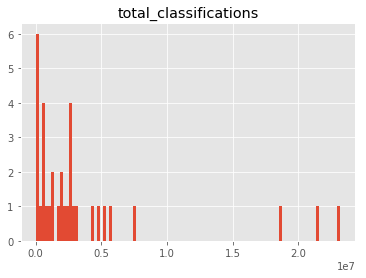

In [14]:
project_df.hist('total_classifications',bins=100)

In [15]:
user_df.describe(percentiles=np.arange(0,1,0.1))

,total_classifications,total_projects
count,1.764209e+06,1.764209e+06
mean,7.077482e+01,1.228675e+00
std,1.939910e+03,1.091383e+00
min,1.000000e+00,1.000000e+00
0%,1.000000e+00,1.000000e+00
10%,1.000000e+00,1.000000e+00
20%,2.000000e+00,1.000000e+00
30.0%,3.000000e+00,1.000000e+00
40%,3.000000e+00,1.000000e+00
50%,5.000000e+00,1.000000e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4ed0204c88>]], dtype=object)

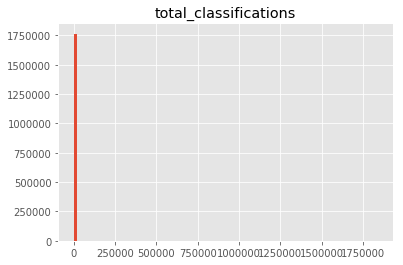

In [16]:
user_df.hist('total_classifications',bins=100)

In [77]:
# number of classifications that don't have a user id
len(classification_df.loc[classification_df['user_id'].isnull()])

5636127

In [76]:
# percent of classifications that don't have a user id
len(classification_df.loc[classification_df['user_id'].isnull()])/len(classification_df)

0.21580764574403294

In [4]:
classification_df.loc[classification_df['user_id'].isnull()]

,id,project_id,user_id,workflow_id,annotations,created_at,user_group_id,completed,gold_standard,expert_classifier,metadata,workflow_version,lifecycled_at
0,6743419,764,NaN,1224,"[{""task"": ""init"", ""value"": 1}]",2016-01-13 07:46:03.869156,2016-01-13 07:46:03.92731,t,NaN,NaN,"{""session"": ""6447163787569179c92064dac989cc6b6...",4.50,2016-01-13 07:46:03.921876
1,11726142,593,NaN,338,"[{""task"": ""T1"", ""value"": [{""choice"": ""NTHNGHR""...",2016-04-26 20:16:43.011371,2016-04-26 20:16:43.102913,t,NaN,NaN,"{""viewport"": {""width"": 1366, ""height"": 665}, ""...",1890.18,2016-04-26 20:16:43.064178
5,6203753,764,NaN,1224,"[{""task"": ""init"", ""value"": 1}]",2016-01-12 22:44:22.724827,2016-01-12 22:44:50.200208,t,NaN,NaN,"{""session"": ""c581c7187116f44178ba479667deb68a2...",4.50,2016-01-12 22:44:50.183696
13,6202914,764,NaN,1224,"[{""task"": ""init"", ""value"": 1}]",2016-01-12 22:43:51.926823,2016-01-12 22:44:34.85784,t,NaN,NaN,"{""session"": ""d48a27be4323a3cffbc2d99eedce208e1...",4.50,2016-01-12 22:44:34.841401
14,6203476,764,NaN,1224,"[{""task"": ""init"", ""value"": 0}]",2016-01-12 22:44:10.567062,2016-01-12 22:44:44.954315,t,NaN,NaN,"{""session"": ""dbce20773a3da115709c4871e1bf698e5...",4.50,2016-01-12 22:44:44.927203
16,6204241,764,NaN,1224,"[{""task"": ""init"", ""value"": 1}]",2016-01-12 22:44:46.484366,2016-01-12 22:44:59.529159,t,NaN,NaN,"{""session"": ""c0065b9c5efff4fc93d12c5285a75f512...",4.50,2016-01-12 22:44:59.508311
22,11720618,3,NaN,1623,"[{""task"": ""init"", ""value"": 0}]",2016-04-26 19:03:02.51404,2016-04-26 19:03:02.552188,t,NaN,NaN,"{""session"": ""92bd27e6797f9b0cd7bcf7b09c0acf01f...",5.16,2016-04-26 19:03:02.545556
23,6202915,764,NaN,1224,"[{""task"": ""init"", ""value"": 1}]",2016-01-12 22:43:51.98791,2016-01-12 22:44:35.728133,t,NaN,NaN,"{""session"": ""2955c62ca8754f5b86eb36cf836e80be1...",4.50,2016-01-12 22:44:35.613859
24,6202997,764,NaN,1224,"[{""task"": ""init"", ""value"": 1}]",2016-01-12 22:43:55.669121,2016-01-12 22:44:36.315538,t,NaN,NaN,"{""session"": ""a22fd1484c1f8a908755712e534751692...",4.50,2016-01-12 22:44:36.280675
27,6203953,764,NaN,1224,"[{""task"": ""init"", ""value"": 1}]",2016-01-12 22:44:33.168229,2016-01-12 22:44:54.005072,t,NaN,NaN,"{""session"": ""f78833fe778e7f1227196969603f485ae...",4.50,2016-01-12 22:44:53.986343
